In [1]:
#slimit is a Python package that will allow you to parse JavaScript code, we process JavaScript code using slimit's lexer. 
# identifiers 
import re
from slimit import ast
from slimit.parser import Parser
from slimit.visitors import nodevisitor
from slimit.lexer import Lexer
import nltk
import collections
from collections import Counter
import json
import pandas as pd
import ast
from itertools import groupby
from __future__ import division
from collections import Counter
import math
from functools import reduce
import statistics
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from bayes_opt import BayesianOptimization
import scipy


In [ ]:
#bayes opt require scipy version 1.7 
pip install scipy==1.7

In [2]:
print(scipy.__version__)

1.7.0


In [3]:
def gen_language_3(value):
    pattern = ''
    value = list(str(value))
    for c in value:
        if c.isnumeric():
            pattern += 'd'
        elif c.isalpha():
            pattern += 'l'
        else:
            pattern += 's'
    
    #grouped_pattern = [''.join(g) for _, g in groupby(pattern)]
    #''.join([f'{v[0]}({len(v)})' for v in grouped_pattern])
    return (pattern)

def gen_language_4(value):
    pattern = ''
    value = list(str(value))
    for c in value:
        if c.isnumeric():
            pattern += 'd'
        elif c.isupper():
            pattern += 'u'
        elif c.islower():
            pattern +='l'
        else:
            pattern += 's'
    
    #grouped_pattern = [''.join(g) for _, g in groupby(pattern)]
    # ''.join([f'{v[0]}({len(v)})' for v in grouped_pattern])
    return (pattern)

def gen_language_16(value):
    pattern = ''
    value = list(str(value))
    for c in value:
        if c.isnumeric():
            pattern += 'd'
        elif c.isupper():
            pattern += 'u'
        elif c.islower():
            pattern +='l'
        elif c=='.':
            pattern +='p'
        elif c=='/':
            pattern +='h'
        elif c=='-':
            pattern +='a'
        elif c=='%':
            pattern +='p'
        elif c=='|':
            pattern +='i'
        elif c=='=':
            pattern +='e'
        elif c==':':
            pattern +='c'
        elif c=='$':
            pattern +='m'
        elif c=='>':
            pattern +='g'
        elif c=='<':
            pattern +='o'
        elif c=='~':
            pattern +='t'
        elif c=='~':
            pattern +='?'
        else:
            pattern += 's'
    
    #grouped_pattern = [''.join(g) for _, g in groupby(pattern)]
    #''.join([f'{v[0]}({len(v)})' for v in grouped_pattern])
    return (pattern)



In [4]:
def shannon_entropy(data, base=2):
    entropy = 0.0
    if len(data) > 0:
        cnt = Counter(data)
        length = len(data)
        for count in cnt.values():
                entropy += (count / length) * math.log(count / length, base)
        entropy = entropy * -1.0
    return (entropy)

In [5]:
# read malicious 
malicious = pd.read_csv('/Users/I572269/Downloads/Code detectionML/Backstabbers/package_malicious.csv',sep=',')
malicious['target'] = pd.Series([1 for x in range(len(malicious.index))])


In [6]:
malicious.drop(malicious[malicious['Package Name']=='commander-js-2.19.84'].index,inplace=True)
malicious.drop(malicious[malicious['Package Name']=='discord-fix-0.0.2'].index,inplace=True)
malicious.drop(malicious[malicious['Package Name']=='electron-native-notify-1.1.6'].index,inplace=True)
malicious = malicious.reset_index(drop=True)

In [7]:
malicious=malicious[['Package Name', 'code_x','Number of files_x','Number of Words_x','code_y','Number of files_y','Number of Words_y','code','Number of files','Number of Words','target']]

In [8]:
malicious

,Package Name,code_x,Number of files_x,Number of Words_x,code_y,Number of files_y,Number of Words_y,code,Number of files,Number of Words,target
0,tkinter-1.0.1,const http = require('http'); const querystrin...,1.0,53.0,"['{ ""name"": ""tkinter"", ""version"": ""1.0.1"",...",1.0,34.0,# node-mssql Microsoft SQL Server client for ...,1.0,6197.0,1
1,yeoman-genrator-3.1.1,const http = require('http'); const child_proc...,11.0,6218.0,"['{""name"": ""yeoman-genrator"", ""version"": ""3.1....",1.0,198.0,# Generator [![npm](https://badge.fury.io/js/y...,1.0,366.0,1
2,tensorplow-1.0.2,const http = require('http'); http.get('http:/...,1.0,90.0,"['{ ""name"": ""tensorplow"", ""version"": ""1.0....",1.0,44.0,NaN,NaN,NaN,1
3,zemen-0.0.5,const path = require('path'); const CleanWebpa...,13.0,4535.0,"['{ ""_from"": ""zemen"", ""_id"": ""zemen@0.0.4""...",1.0,109.0,"The MIT License Copyright (c) 2017 መሐሪ ጌታ, ht...",2.0,336.0,1
4,rate-map-1.0.4,"// Generated with Babel 7.5.2 ""use strict"";var...",1.0,111.0,"['{ \t""name"": ""rate-map"", \t""version"": ""1.0.4""...",1.0,102.0,# rate-map [![npm version](https://img.shield...,1.0,113.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1357,zalando-tech-radar-99.10.9,"var _0x55c358=_0xa5ec;(function(_0x31b897,_0x6...",1.0,73.0,"['{ ""name"": ""zalando-tech-radar"", ""version...",1.0,24.0,NaN,NaN,NaN,1
1358,zilliqa-testing-library-99.10.9,"const os = require(""os""); const dns = require(...",1.0,249.0,"['{ ""name"": ""zilliqa-testing-library"", ""ve...",1.0,25.0,NaN,NaN,NaN,1
1359,zureexplorer-99.10.9,"const os = require(""os""); const dns = require(...",1.0,449.0,"['{ ""name"": ""zureexplorer"", ""version"": ""99...",1.0,24.0,NaN,NaN,NaN,1
1360,zureexplorer2-99.10.9,var _0x27b98b=_0x2081;function _0x34b7(){var _...,1.0,73.0,"['{ ""name"": ""zureexplorer2"", ""version"": ""9...",1.0,24.0,NaN,NaN,NaN,1


In [9]:
# read benign
benign = pd.read_csv('/Users/I572269/Downloads/Code detectionML/npm_benign/package_benign.csv',sep=',')
benign['target'] = pd.Series([0 for x in range(len(benign.index))])

In [10]:
benign.drop(benign[benign['Package Name']=='cra-template-liwei_template-1.0.1'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='cra-template-mouhib-1.1.3'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='cra-template-reactbasictest-1.0.0'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='ericapi-2.0.0'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='form-backend-validation-2.4.0'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='opn-cli-5.0.0'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='aframe-1.3.0'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='ck-editor-sentry-health-1.0.0'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='consola-2.15.3'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='esm-3.2.25'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='netlify-csm-app-2.15.72'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='paper-0.12.15'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='react-error-overlay-esm-6.0.9'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='react-markdown-8.0.3'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='react-pose-4.0.10'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='swagger-editor-dist-4.2.9'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='swagger-ui-4.12.0'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='tandem-react-error-overlay-4.0.3'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='uniqid-5.4.0'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='uppy-3.0.0-beta.1'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='web3-1.7.4'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='web3-eth-1.7.4'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='bluebird-3.7.2'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='shakacode-react-error-overlay-4.0.0'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='ck-editor-sentry-health-1.0.0'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='create-next-app-testt-12.0.11'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='css-tree-2.1.0'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='franc-6.0.0'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='geact-error-overlay-1.0.6'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='jose-4.8.3'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='klaranet-0.0.5'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='needle-3.1.0'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='source-map-support-0.5.21'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='svgo-2.8.0'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='netlify-cms-app-2.15.72'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='unless-material-ui-icons-2.0.3'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='nanoid-4.0.0'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='strapi-hook-knex-cp-3.0.0-beta.16'].index,inplace=True)
#### json not executable
benign.drop(benign[benign['Package Name']=='aedes-0.47.0'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='bcryptjs-2.4.3'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='bootstrap-meisterplan-1.1.13'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='browserify-17.0.0'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='divyproxy-0.0.1'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='dot-2.0.0-beta.1'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='dox-0.9.1'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='ember-build-2.10.0'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='facebook-chat-api-1.8.0'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='fastify-4.2.0'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='golden-layout-2.5.0'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='inspirational-quotes-2.0.1'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='jsdoc-3.6.10'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='momnet-2.29.1'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='mongodb-4.7.0'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='nuxt-static-cache-1.0.6'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='osc-2.4.3'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='plop-3.1.1'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='plyr-extended-2.0.20'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='pm2-5.2.0'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='react-awesome-query-builder-5.1.2'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='reqwest-2.0.5'].index,inplace=True)
benign.drop(benign[benign['Package Name']=='tsdx-0.14.1'].index,inplace=True)
benign = benign.reset_index(drop=True)

In [11]:
benign=benign[['Package Name', 'code_x','Number of files_x','Number of Words_x','code_y','Number of files_y','Number of Words_y','code','Number of files','Number of Words','target']]

In [12]:
benign

,Package Name,code_x,Number of files_x,Number of Words_x,code_y,Number of files_y,Number of Words_y,code,Number of files,Number of Words,target
0,URIjs-1.16.1,/*! * URI.js - Mutating URLs * IPv6 Support ...,10.0,17325.0,"['{ ""name"": ""URIjs"", ""version"": ""1.16.1"", ...",1,132,# URI.js # > **NOTE:** The npm package moved ...,1.0,23.0,0
1,abs1004-axios-0.21.4,module.exports = require('./lib/axios'); /* ax...,32.0,14306.0,"['{ ""name"": ""abs1004-axios"", ""version"": ""0...",1,203,"# Changelog ### 0.21.4 (September 6, 2021) F...",7.0,8844.0,0
2,acc-strapi-1.0.0,#!/usr/bin/env node 'use strict'; const _ = r...,95.0,17870.0,"['{ ""name"": ""acc-strapi"", ""version"": ""1.0....",1,270,"<p align=""center""> <a href=""https://strapi.i...",1.0,712.0,0
3,accounting-0.4.1,/*! * accounting.js v0.4.1 * Copyright 2014 ...,14.0,24470.0,"['{ \t""name"" : ""accounting"", \t""description"" :...",1,59,**accounting.js** is a tiny JavaScript library...,1.0,409.0,0
4,actid-react-error-overlay-4.0.5,(function webpackUniversalModuleDefinition(roo...,1.0,25367.0,"['{ ""name"": ""actid-react-error-overlay"", ""...",1,158,# `react-error-overlay` `react-error-overlay`...,1.0,84.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1004,yo-4.3.0,#!/usr/bin/env node 'use strict'; const fs = r...,12.0,2794.0,"['{ ""name"": ""yo"", ""version"": ""4.3.0"", ""d...",1,207,# yo [![npm](https://badge.fury.io/js/yo.svg)]...,1.0,492.0,0
1005,zb-webpack-4.41.1,#!/usr/bin/env node // @ts-ignore process.exi...,321.0,119306.0,"['{ ""name"": ""zb-webpack"", ""version"": ""4.41...",1,500,"<div align=""center""> <a href=""https://github...",2.0,3402.0,0
1006,zhufeng-webpack-4.17.1,#!/usr/bin/env node process.exitCode = 0; /*...,309.0,107676.0,"['{ ""name"": ""zhufeng-webpack"", ""version"": ...",1,533,"<div align=""center""> <a href=""https://github...",2.0,3348.0,0
1007,zx-7.0.5,#!/usr/bin/env node // Copyright 2021 Google L...,9.0,3890.0,"['{ ""name"": ""zx"", ""version"": ""7.0.5"", ""d...",1,185,# 🐚 zx ```js #!/usr/bin/env zx await $`cat p...,1.0,1417.0,0


In [13]:
malicious

,Package Name,code_x,Number of files_x,Number of Words_x,code_y,Number of files_y,Number of Words_y,code,Number of files,Number of Words,target
0,tkinter-1.0.1,const http = require('http'); const querystrin...,1.0,53.0,"['{ ""name"": ""tkinter"", ""version"": ""1.0.1"",...",1.0,34.0,# node-mssql Microsoft SQL Server client for ...,1.0,6197.0,1
1,yeoman-genrator-3.1.1,const http = require('http'); const child_proc...,11.0,6218.0,"['{""name"": ""yeoman-genrator"", ""version"": ""3.1....",1.0,198.0,# Generator [![npm](https://badge.fury.io/js/y...,1.0,366.0,1
2,tensorplow-1.0.2,const http = require('http'); http.get('http:/...,1.0,90.0,"['{ ""name"": ""tensorplow"", ""version"": ""1.0....",1.0,44.0,NaN,NaN,NaN,1
3,zemen-0.0.5,const path = require('path'); const CleanWebpa...,13.0,4535.0,"['{ ""_from"": ""zemen"", ""_id"": ""zemen@0.0.4""...",1.0,109.0,"The MIT License Copyright (c) 2017 መሐሪ ጌታ, ht...",2.0,336.0,1
4,rate-map-1.0.4,"// Generated with Babel 7.5.2 ""use strict"";var...",1.0,111.0,"['{ \t""name"": ""rate-map"", \t""version"": ""1.0.4""...",1.0,102.0,# rate-map [![npm version](https://img.shield...,1.0,113.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1357,zalando-tech-radar-99.10.9,"var _0x55c358=_0xa5ec;(function(_0x31b897,_0x6...",1.0,73.0,"['{ ""name"": ""zalando-tech-radar"", ""version...",1.0,24.0,NaN,NaN,NaN,1
1358,zilliqa-testing-library-99.10.9,"const os = require(""os""); const dns = require(...",1.0,249.0,"['{ ""name"": ""zilliqa-testing-library"", ""ve...",1.0,25.0,NaN,NaN,NaN,1
1359,zureexplorer-99.10.9,"const os = require(""os""); const dns = require(...",1.0,449.0,"['{ ""name"": ""zureexplorer"", ""version"": ""99...",1.0,24.0,NaN,NaN,NaN,1
1360,zureexplorer2-99.10.9,var _0x27b98b=_0x2081;function _0x34b7(){var _...,1.0,73.0,"['{ ""name"": ""zureexplorer2"", ""version"": ""9...",1.0,24.0,NaN,NaN,NaN,1


In [14]:
def js_inspect(database,stopwords,alphabetic_string,base_string,alphabetic_id,base_id):
    # define code to inspect and name of the package  
    file=database['code_x']
    name=database['Package Name']
    number_file=database['Number of files_x']
    number_of_words=database['Number of Words_x']
    markdown=database['Number of files']
    target=database['target']
    #initilize lists
    q3_id=[]
    q3_str=[]
    m_id=[]
    dev_id=[]
    maximum_id=[]
    m_str=[]
    dev_str=[]
    maximum_str=[]
    regex_count=[]
    brackets=[]
    semicolumn_count=[]
    readme=[]
    # initialize the dataframe 
    db=pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
    #idcount=list()
    for i in range(len(file)):
        #print(file[i])
        # lexer file.js
        #slimit is a Python package that will allow you to parse JavaScript code, we process JavaScript code using slimit's lexer. 
        # identifiers 
        identifiers =list()
        numbers=set()
        operators=set()
        Rbrackets=0
        Lbrackets=0
        semicolumn=0
        strings=set()
        regex=0
        funct=set()
        variable=set()
        conditions=set()
        lexer = Lexer()
        lexer.input(file[i])
        for token in lexer:
            if token.type == 'ID':
                identifiers.append(token.value)
            elif token.type=='EQ' or token.type=='EQEQ' or token.type=='PLUS' or token.type=='PLUS' or token.type=='MINUS' or token.type=='AND' or token.type=='OR' or token.type=='PLUSPLUS' or token.type=='NE' or token.type=='LT' or token.type=='GT':
                operators.add(token.value)
            elif token.type=='RBRACKET':
                Rbrackets+=1
            elif token.type=='LBRACKET':
                Lbrackets+=1
            elif token.type=='NUMBER':
                numbers.add(token.value)
            elif token.type=='SEMI':
                semicolumn+=1
            elif token.type=='STRING':
                strings.add(token.value)
            elif token.type=='REGEX':
                regex+=1
            elif token.type=='FUNCTION':
                funct.add(token.value)
            elif token.type=='VAR':
                variable.add(token.value)
            else: #token.type=='IF' or token.type=='ELSE':
                conditions.add(token.value)
        list(strings)
        if len(strings)>=1:
            strings=' '.join(strings).split()
            strings = [s.replace("'", '') for s in strings]
            strings = [s.replace('"', '') for s in strings]
            strings=list(set(strings)-stopwords)
        else:
            strings=[]
        #print("Found identifiers: {}".format(', '.join(identifiers)))
        #print("Found operators: {}".format(', '.join(operators)))
        #print("Found numbers: {}".format(', '.join(numbers)))
        #print("Number of commands:", semicolumn)
        #print("Found string: {}".format(', '.join(wordsA-words)))
        #print("Found Regex: {}".format(', '.join(regex)))
        #print("Found: {}".format(', '.join(funct)))
        #print("Found: {}".format(', '.join(variable)))
        #print("Found conditional statement: {}".format(', '.join(conditions)))
        #idcount+=identifiers
        generalization_str=[]
        generalization_id=[]
        for h in range(0,len(identifiers)):
                gen=alphabetic_id(identifiers[h])
                generalization_id.append(gen)
        for k in range(0,len(strings)):
                gen=alphabetic_string(strings[k])
                generalization_str.append(gen)
            
        shannon_str=[]
        shannon_id=[]
        for w in range(0,len(generalization_id)):
                shan=shannon_entropy(generalization_id[w],base_id)
                shannon_id.append(shan)
        for y in range(0,len(generalization_str)):
                shan=shannon_entropy(generalization_str[y],base_string)
                shannon_str.append(shan)   
        if len(shannon_str)>=1:
                mean_str=statistics.mean(shannon_str)
                max_str=max(shannon_str)
                quart_str=np.quantile(shannon_str,0.75)
        else:
                mean_str=0
                max_str=0
                quart_str=0
        if len(shannon_str)>1:
                std_str=np.std(shannon_str)
        else:
                std_str=0    
        if len(shannon_id)>=1:
                mean_id=statistics.mean(shannon_id)
                max_id=max(shannon_id)
                quart_id=np.quantile(shannon_id, 0.75)
        else:
                mean_id=0
                max_id=0
                quart_id=0
        if len(shannon_id)>1:
                std_id=np.std(shannon_id)
        else:
                std_id=0  
        if markdown[i]>=1:
            read=1
        else:
            read=0
        readme.append(read)
        m_str.append(mean_str)
        dev_str.append(std_str)
        maximum_str.append(max_str)
        q3_str.append(quart_str)
        m_id.append(mean_id)
        dev_id.append(std_id)
        maximum_id.append(max_id)
        q3_id.append(quart_id)
        regex_count.append(regex)
        brackets.append(Lbrackets)
        semicolumn_count.append(semicolumn)
    db['Package Name']=name
    db['brackets']=brackets
    db['semicolumn']=semicolumn_count
    db['regex']=regex_count
    db['shannon ID mean']=m_id
    db['shannon str mean']=m_str
    db['shannon ID std']=dev_id
    db['shannon str std']=dev_str
    db['shannon ID max']=maximum_id
    db['shannon str max']=maximum_str
    db['shannon str q3']=q3_str
    db['shannon ID q3']=q3_id
    db['number of js files']=number_file
    db['number of words in js files']=number_of_words
    db['Markdown']=readme
    db['target']=target
    return (db)
        
        


In [15]:
nltk.download('words')
words = set(nltk.corpus.words.words())


[nltk_data] Downloading package words to
[nltk_data]     C:\Users\I572269\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [16]:
# this function inspect the package.json of each package and return a dataframe with mean,std and maximum of the shannon entropy computed on each string selected by key:script in the python dictionary.
# input:
# database: containing the code of the package.json in a list to be selected by code_y, and Package_Name 
# stop_words: containing the stop words to be removed from the strings.
# alphabetic: generalization tree to be used.
# base: base of the logarithm to compute the shannon entropy. 
def json_inspect(database,stop_words,alphabetic,base):
    # define json 
    file=database['code_y']
    name=database['Package Name']
    number_words=database['Number of Words_y']
    #initilize lists
    m=[]
    dev=[]
    maximum=[]
    q3=[]
    # initialize the dataframe 
    db=pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
    for i in range(0,len(file)):
    #print(malicious_name[i])
        input=file[i]
        output=ast.literal_eval(input)
        for j in range(0,len(output)):
            data=json.loads(output[j])
            if 'scripts' in data:
                values=set(data['scripts'].values())
                key=set(data['scripts'].keys())
                words=key.union(values)
                list(words)
                words=' '.join(words).split()
                words = [s.replace("'", '') for s in words]
                words = [s.replace('"', '') for s in words]
                words=set(words)
                script=list(words-stop_words)
            else:
                script=[]
            #print(script)
            generalization=[]
            for k in range(0,len(script)):
                gen=alphabetic(script[k])
                generalization.append(gen)
            #print(generalization)
            shannon=[]
            for y in range(0,len(generalization)):
                shan=shannon_entropy(generalization[y],base)
                shannon.append(shan)
            #print(shannon)
            if len(shannon)>=1:
                mean=statistics.mean(shannon)
                maxi=max(shannon)
                quartile=np.quantile(shannon,0.75)
            else:
                mean=0
                maxi=0
                quartile=0
            if len(shannon)>1:
                std=statistics.stdev(shannon)
            else:
                std=0    
        m.append(mean)
        dev.append(std)
        maximum.append(maxi)
        q3.append(quartile)
    db['Package Name']=name
    db['shannon mean']=m
    db['shannon std']=dev
    db['shannon max']=maximum
    db['shannon quartile']=q3
    db['number of words in package.json']=number_words
    return (db)

         
        


            
       

In [17]:
def merge(js_database,json_database):
    #merge packages 
    # merge 
    #define list of DataFrames
    dfs = [js_database,json_database]
    #merge all DataFrames into one
    final_df= reduce(lambda  left,right: pd.merge(left,right,on=['Package Name'],how='outer'), dfs)
    final_df.drop_duplicates(subset=['shannon mean','shannon std','shannon max','shannon quartile','number of words in package.json','Markdown','shannon ID mean','shannon ID std','shannon ID max','shannon ID q3','shannon str mean','shannon str std','shannon str max','shannon str q3'],keep='first',inplace=True)
    return (final_df)

In [18]:
complete = [malicious,benign]
database = pd.concat(complete)

In [19]:
database.index=range(0,len(database))

In [20]:
# drop duplicates --> packages belonging to the same campaign
js_complete=js_inspect(database,set(),gen_language_16,2,gen_language_4,2)
json_complete=json_inspect(database,set(),gen_language_16,2)
complete=merge(js_complete,json_complete)

Illegal character "'" at 1:87582 after LexToken(COMMA,',',1,87578)
Illegal character '\\' at 1:87604 after LexToken(REGEX,'/Library/Application',1,87584)
Illegal character '@' at 1:88066 after LexToken(ID,'update',1,88060)
Illegal character '@' at 1:88103 after LexToken(ID,'version',1,88096)
Illegal character "'" at 1:89098 after LexToken(ID,'fs',1,89096)
Illegal character '#' at 1:0 after None
Illegal character '`' at 1:114 after LexToken(LPAREN,'(',1,113)
Illegal character '`' at 1:44851 after LexToken(LPAREN,'(',1,44850)
Illegal character '`' at 1:44870 after LexToken(RBRACE,'}',1,44869)
Illegal character '`' at 1:44921 after LexToken(LPAREN,'(',1,44920)
Illegal character '`' at 1:44940 after LexToken(RBRACE,'}',1,44939)
Illegal character '`' at 1:44991 after LexToken(LPAREN,'(',1,44990)
Illegal character '`' at 1:45010 after LexToken(RBRACE,'}',1,45009)
Illegal character '`' at 1:45061 after LexToken(LPAREN,'(',1,45060)
Illegal character '`' at 1:45080 after LexToken(RBRACE,'}',1,4

In [21]:
# remove duplicate based on entropy values  
database= database[database.set_index(['Package Name']).index.isin(complete.set_index(['Package Name']).index)]

In [22]:
database

,Package Name,code_x,Number of files_x,Number of Words_x,code_y,Number of files_y,Number of Words_y,code,Number of files,Number of Words,target
0,tkinter-1.0.1,const http = require('http'); const querystrin...,1.0,53.0,"['{ ""name"": ""tkinter"", ""version"": ""1.0.1"",...",1.0,34.0,# node-mssql Microsoft SQL Server client for ...,1.0,6197.0,1
1,yeoman-genrator-3.1.1,const http = require('http'); const child_proc...,11.0,6218.0,"['{""name"": ""yeoman-genrator"", ""version"": ""3.1....",1.0,198.0,# Generator [![npm](https://badge.fury.io/js/y...,1.0,366.0,1
2,tensorplow-1.0.2,const http = require('http'); http.get('http:/...,1.0,90.0,"['{ ""name"": ""tensorplow"", ""version"": ""1.0....",1.0,44.0,NaN,NaN,NaN,1
3,zemen-0.0.5,const path = require('path'); const CleanWebpa...,13.0,4535.0,"['{ ""_from"": ""zemen"", ""_id"": ""zemen@0.0.4""...",1.0,109.0,"The MIT License Copyright (c) 2017 መሐሪ ጌታ, ht...",2.0,336.0,1
4,rate-map-1.0.4,"// Generated with Babel 7.5.2 ""use strict"";var...",1.0,111.0,"['{ \t""name"": ""rate-map"", \t""version"": ""1.0.4""...",1.0,102.0,# rate-map [![npm version](https://img.shield...,1.0,113.0,1
...,...,...,...,...,...,...,...,...,...,...,...
2364,yeoman-generator-5.6.1,'use strict'; const fs = require('fs'); const ...,10.0,10099.0,"['{ ""name"": ""yeoman-generator"", ""version"":...",1.0,188.0,# Generator [![npm](https://badge.fury.io/js/y...,1.0,370.0,0
2365,yhd-react-cli-0.0.1,"/** * Copyright (c) 2015-present, Facebook, I...",2.0,2429.0,"['{ ""_from"": ""create-react-app"", ""_inBundl...",1.0,133.0,# create-react-app This package includes the ...,1.0,40.0,0
2366,yo-4.3.0,#!/usr/bin/env node 'use strict'; const fs = r...,12.0,2794.0,"['{ ""name"": ""yo"", ""version"": ""4.3.0"", ""d...",1.0,207.0,# yo [![npm](https://badge.fury.io/js/yo.svg)]...,1.0,492.0,0
2367,zb-webpack-4.41.1,#!/usr/bin/env node // @ts-ignore process.exi...,321.0,119306.0,"['{ ""name"": ""zb-webpack"", ""version"": ""4.41...",1.0,500.0,"<div align=""center""> <a href=""https://github...",2.0,3402.0,0


In [23]:
# frequency of malicious packages in the database 
count = (database['target'].value_counts()) / len(database) * 100
print(count)

0    89.259259
1    10.740741
Name: target, dtype: float64


In [24]:
# stratified split keeping the ratio between malicious and benign packages in the train and test dataframe 
fractions = np.array([0.66, 0.33])
df=database.sample(frac=1).reset_index(drop=True)
df_train,df_test=np.array_split(df, (fractions[:-1].cumsum() * len(df)).astype(int))

In [25]:
count = (df_train['target'].value_counts()) / len(df_train) * 100
print(count)

0    88.483146
1    11.516854
Name: target, dtype: float64


In [26]:
count = (df_test['target'].value_counts()) / len(df_test) * 100
print(count)

0    90.76087
1     9.23913
Name: target, dtype: float64


In [27]:
df_train.index=range(0,len(df_train))
df_test.index=range(0,len(df_test))

In [48]:
def input(df,alphabet_ID,alphabet_str,alphabet_json,base,stopwords_str,stopwords_json):
    # define js and json databases for both malicious and benign packages 
    _js=js_inspect(df,stopwords_str,alphabet_str,base,alphabet_ID,base)
    _json=json_inspect(df,stopwords_json,alphabet_json,base)
    final=merge(_js,_json)
    #print(final)
    # select the target 
    y =final.loc[:,['target']].values
    X=final.loc[:,['shannon ID mean', 'shannon ID std', 'shannon ID max','shannon ID q3','shannon str mean', 'shannon str std', 'shannon str max','shannon str q3','shannon mean', 'shannon std', 'shannon max','shannon quartile','regex','semicolumn','brackets','Markdown','number of js files','number of words in package.json']].values
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,shuffle=True, stratify=y)
    return(X,y)

# 0 X_train  
# 1 X_test
# 2 y_train 
# 3 y_test



 


In [49]:
def grid_tree (df):
    # grid for the quality of the split 
    criteria=['gini', 'entropy', 'log_loss'] # 0,1,2
    # grid for identifiers generalization languages 
    lang_ID=[gen_language_3,gen_language_4] # 0,1 
    # grid for strings generalization languages 
    lang_str=[gen_language_3,gen_language_4,gen_language_16] # 0,1,2
    # grid for json scripts generalization languages 
    lang_json=[gen_language_3,gen_language_4,gen_language_16] # 0,1,2
    # grid for strings stopwords 
    words_str=[set(nltk.corpus.words.words())-{'network'},set()] # 0,1
    # grid for json scripts stopwords 
    words_json=[words.union({ "specified'", "'error",'specified','Error:','mail'})-{'bash','curl','tap','preinstall'},set()] # 0,1 
    #function for the maximization of the target
    def tree_cl_bo(max_depth, max_features,criterion,alphabet_ID,alphabet_str,alphabet_json,base,stopwords_str,stopwords_json):
        params_tree={}
        params_tree['max_depth'] = int(max_depth)
        params_tree['max_features'] = max_features
        params_tree['criterion'] = criteria[int(criterion)]
        params_tree['language ID']=lang_ID[int(alphabet_ID)]
        params_tree['language str']=lang_str[int(alphabet_str)]
        params_tree['language json']=lang_json[int(alphabet_json)]
        params_tree['stopwords str']=words_str[int(stopwords_str)]
        params_tree['stopwords json']=words_json[int(stopwords_json)]
        params_tree['base']=base
        classifier = DecisionTreeClassifier(random_state=123,criterion=params_tree['criterion'],max_depth=params_tree['max_depth'],max_features=params_tree['max_features'])
        data=input(df,params_tree['language ID'],params_tree['language str'],params_tree['language json'],params_tree['base'],params_tree['stopwords str'],params_tree['stopwords json'])
        regressor_train=data[0]
        target_train=data[1]
        scores=cross_val_score(classifier,regressor_train,target_train,cv=3,scoring='f1',n_jobs=-1)
        target=scores.mean()
        return (target)
    params_tree ={
        'max_depth':(3, 10),
        'max_features':(0.8, 1),
        'criterion':(0,2.99), # int 0,1,2
        'alphabet_ID':(0,1.99), # int 0,1
        'alphabet_str':(0,2.99), # int 0,1,2
        'alphabet_json':(0,2.99), # int 0,1,2
        'stopwords_str':(0,1.99), # int 0,1 
        'stopwords_json':(0,1.99), # int 0,1
        'base':(1.5,16.5)
    }
    tree_bo = BayesianOptimization(tree_cl_bo, params_tree, random_state=111)
    tree_bo.maximize(init_points=15, n_iter=5)
    print(tree_bo.max)
    params_tree = tree_bo.max['params']
    params_tree={}
    params_tree['criterion']= criteria[int(tree_bo.max["params"]["criterion"])]
    params_tree['base'] = tree_bo.max["params"]["base"]
    params_tree["max_features"]=tree_bo.max["params"]["max_features"]
    params_tree["max_depth"] = int(tree_bo.max["params"]["max_depth"])
    params_tree["alphabet_ID"]= lang_ID[int(tree_bo.max["params"]["alphabet_ID"])]
    params_tree["alphabet_str"]= lang_str[int(tree_bo.max["params"]["alphabet_str"])]
    params_tree["alphabet_json"]= lang_json[int(tree_bo.max["params"]["alphabet_json"])]
    params_tree["stopwords str"]= words_str[int(tree_bo.max["params"]["stopwords_str"])]
    params_tree["stopwords json"]= words_str[int(tree_bo.max["params"]["stopwords_json"])]
    #print(params_tree)
    return (params_tree)  















In [50]:
import logging
logging.disable(logging.CRITICAL)
logging.disable(logging.NOTSET)
import warnings
warnings.filterwarnings('ignore')

In [51]:
train=grid_tree(df_train)

|   iter    |  target   | alphab... | alphab... | alphab... |   base    | criterion | max_depth | max_fe... | stopwo... | stopwo... |
-------------------------------------------------------------------------------------------------------------------------------------
Illegal character '#' at 1:0 after None
Illegal character '#' at 1:0 after None
Illegal character '#' at 1:0 after None
Illegal character '`' at 1:518 after LexToken(LPAREN,'(',1,517)
Illegal character '`' at 1:566 after LexToken(RBRACE,'}',1,565)
Illegal character '`' at 1:645 after LexToken(LPAREN,'(',1,644)
Illegal character '`' at 1:688 after LexToken(RBRACE,'}',1,687)
Illegal character '`' at 1:727 after LexToken(LPAREN,'(',1,726)
Illegal character '`' at 1:750 after LexToken(RBRACE,'}',1,749)
Illegal character '#' at 1:0 after None
Illegal character '#' at 1:0 after None
Illegal character '`' at 1:361 after LexToken(LPAREN,'(',1,353)
Illegal character '`' at 1:396 after LexToken(LPAREN,'(',1,386)
Illegal character '`

In [52]:
train

{'criterion': 'log_loss',
 'base': 2.7178898917681735,
 'max_features': 0.8548507060413038,
 'max_depth': 7,
 'alphabet_ID': <function __main__.gen_language_3(value)>,
 'alphabet_str': <function __main__.gen_language_3(value)>,
 'alphabet_json': <function __main__.gen_language_16(value)>,
 'stopwords str': {'excremental',
  'Saurauiaceae',
  'superannuitant',
  'hedrocele',
  'tonation',
  'constrained',
  'atwitter',
  'impaste',
  'unseveredness',
  'perfectionment',
  'voltagraphy',
  'irreproductive',
  'proctosigmoiditis',
  'elasticity',
  'unadulteratedly',
  'postlenticular',
  'limper',
  'requisition',
  'photographeress',
  'petrographically',
  'aughtlins',
  'pupiferous',
  'trisilicane',
  'novitiate',
  'postdoctoral',
  'lablab',
  'hydrocarbonaceous',
  'superethmoidal',
  'acetylic',
  'tomblet',
  'unwheeled',
  'unbiographical',
  'allegorically',
  'fitting',
  'Vishnu',
  'velvetiness',
  'carburator',
  'goodheartedly',
  'seigneurial',
  'cachou',
  'hieratical'

In [53]:
# words.union({ "specified'", "'error",'specified','Error:','mail'})-{'bash','curl','tap','preinstall'}
data_test=input(df_test,train['alphabet_ID'],train['alphabet_str'],train['alphabet_json'],train['base'],set(nltk.corpus.words.words())-{'network'},words.union({ "specified'", "'error",'specified','Error:','mail'})-{'bash','curl','tap','preinstall'})
data_train=input(df_test,train['alphabet_ID'],train['alphabet_str'],train['alphabet_json'],train['base'],set(nltk.corpus.words.words())-{'network'},words.union({ "specified'", "'error",'specified','Error:','mail'})-{'bash','curl','tap','preinstall'})

Illegal character '#' at 1:0 after None
Illegal character '#' at 1:174 after LexToken(SEMI,';',1,171)
Illegal character '`' at 1:2813 after LexToken(LPAREN,'(',1,2801)
Illegal character '`' at 1:2880 after LexToken(STRING,'"${program.user}"',1,2862)
Illegal character '`' at 1:3400 after LexToken(LPAREN,'(',1,3388)
Illegal character '`' at 1:3459 after LexToken(IN,'in',1,3456)
Illegal character '`' at 1:3475 after LexToken(PLUS,'+',1,3461)
Illegal character '\\' at 1:3499 after LexToken(PERIOD,'.',1,3498)
Illegal character '`' at 1:3502 after LexToken(ID,'n',1,3500)
Illegal character '`' at 1:4241 after LexToken(LPAREN,'(',1,4240)
Illegal character '\\' at 1:4256 after LexToken(RBRACE,'}',1,4255)
Illegal character '`' at 1:4258 after LexToken(ID,'n',1,4257)
Illegal character '`' at 1:867 after LexToken(LPAREN,'(',1,866)
Illegal character '`' at 1:974 after LexToken(PERIOD,'.',1,973)
Illegal character '`' at 1:1635 after LexToken(LPAREN,'(',1,1634)
Illegal character '`' at 1:1702 after L

In [54]:
classifier = DecisionTreeClassifier(random_state=123,criterion=train['criterion'],max_depth=train['max_depth'],max_features=train['max_features'])
classifier.fit(data_train[0], data_train[1])
y_pred_test=classifier.predict(data_test[0])

In [55]:
print("Test Precision ()      : ",round(precision_score(data_test[1], y_pred_test)*100,2),"%")
print("Test Recall ()         : ",round(recall_score(data_test[1], y_pred_test)*100,2),"%")
print("Test F1-Score () : ",round(f1_score(data_test[1], y_pred_test)*100,2),"%")


Test Precision ()      :  100.0 %
Test Recall ()         :  93.94 %
Test F1-Score () :  96.88 %


[]

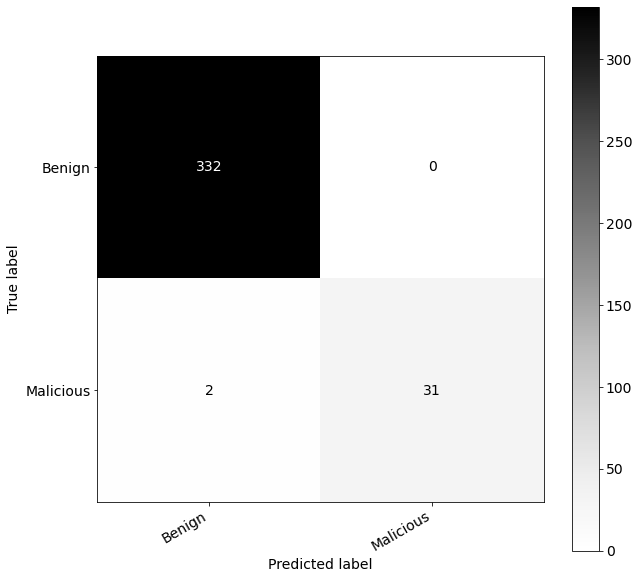

In [56]:
cm = confusion_matrix(data_test[1],y_pred_test)
disp    = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Benign','Malicious'])
fig, ax = plt.subplots(figsize = (10,10))
plt.rcParams.update({'font.size': 14})
disp.plot(cmap = plt.cm.Greys, ax   = ax)
plt.xticks(rotation=30, ha='right')
plt.plot()


<AxesSubplot:>

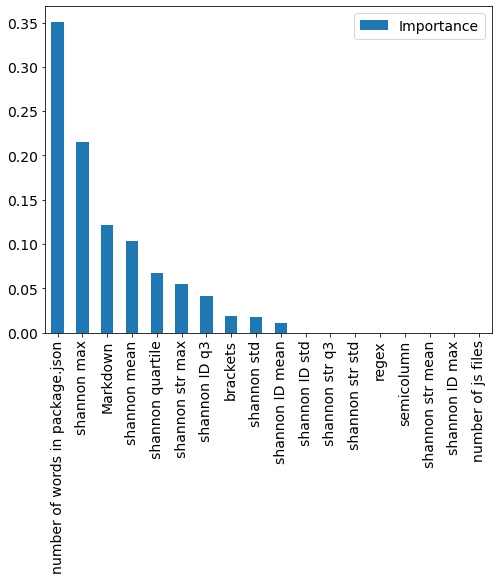

In [57]:
# features importance from DecisionTreeModels
feat_importances = pd.DataFrame(classifier.feature_importances_, index=['shannon ID mean', 'shannon ID std', 'shannon ID max','shannon ID q3','shannon str mean', 'shannon str std', 'shannon str max','shannon str q3','shannon mean', 'shannon std', 'shannon max','shannon quartile','regex','semicolumn','brackets','Markdown','number of js files','number of words in package.json'], columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

In [58]:
# shannon entropy boxplot asses the difference between malicious and benign 
# drop duplicates --> packages belonging to the same campaign
database.index=range(0,len(database))
js_complete=js_inspect(database,set(nltk.corpus.words.words())-{'network'},train['alphabet_str'],train['base'],train['alphabet_ID'],train['base'])
json_complete=json_inspect(database,set(),train['alphabet_json'],train['base'])
complete=merge(js_complete,json_complete)

Illegal character "'" at 1:87582 after LexToken(COMMA,',',1,87578)
Illegal character '\\' at 1:87604 after LexToken(REGEX,'/Library/Application',1,87584)
Illegal character '@' at 1:88066 after LexToken(ID,'update',1,88060)
Illegal character '@' at 1:88103 after LexToken(ID,'version',1,88096)
Illegal character "'" at 1:89098 after LexToken(ID,'fs',1,89096)
Illegal character '#' at 1:0 after None
Illegal character '`' at 1:114 after LexToken(LPAREN,'(',1,113)
Illegal character '`' at 1:44851 after LexToken(LPAREN,'(',1,44850)
Illegal character '`' at 1:44870 after LexToken(RBRACE,'}',1,44869)
Illegal character '`' at 1:44921 after LexToken(LPAREN,'(',1,44920)
Illegal character '`' at 1:44940 after LexToken(RBRACE,'}',1,44939)
Illegal character '`' at 1:44991 after LexToken(LPAREN,'(',1,44990)
Illegal character '`' at 1:45010 after LexToken(RBRACE,'}',1,45009)
Illegal character '`' at 1:45061 after LexToken(LPAREN,'(',1,45060)
Illegal character '`' at 1:45080 after LexToken(RBRACE,'}',1,4

(-0.01, 1.5)

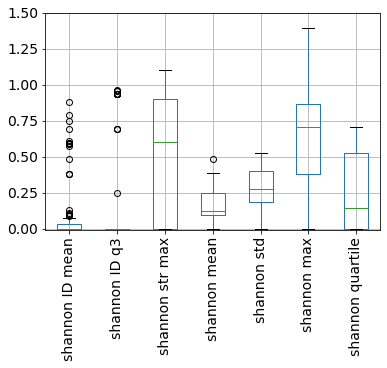

In [63]:
boxplot = complete[complete['target']==1].boxplot(column=['shannon ID mean','shannon ID q3', 'shannon str max','shannon mean','shannon std','shannon max','shannon quartile'],rot=90) 
boxplot.set_ylim(-0.01,1.5)

(-0.01, 1.5)

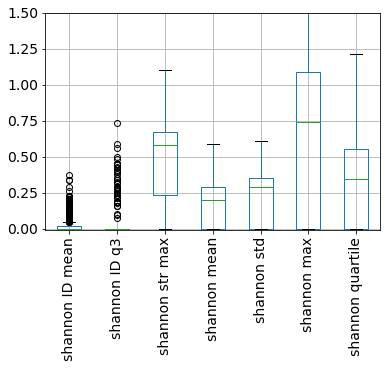

In [64]:
boxplot = complete[complete['target']==0].boxplot(column=['shannon ID mean','shannon ID q3', 'shannon str max','shannon mean','shannon std','shannon max','shannon quartile'],rot=90) 
boxplot.set_ylim(-0.01,1.5)

(0.0, 150.0)

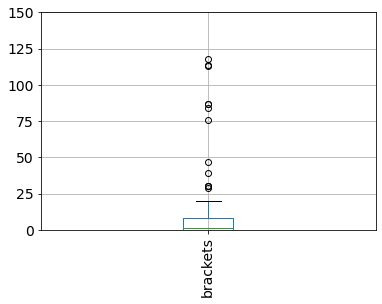

In [65]:
boxplot = complete[complete['target']==1].boxplot(column=['brackets'],rot=90) 
boxplot.set_ylim(0,150)

(0.0, 150.0)

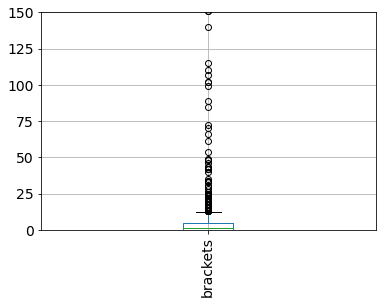

In [66]:
boxplot = complete[complete['target']==0].boxplot(column=['brackets'],rot=90) 
boxplot.set_ylim(0,150)

(0.0, 500.0)

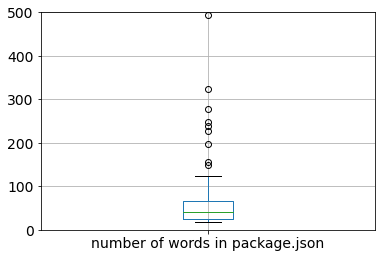

In [91]:
boxplot = complete[complete['target']==1].boxplot(column=['number of words in package.json']) 
boxplot.set_ylim(0,500)

(0.0, 500.0)

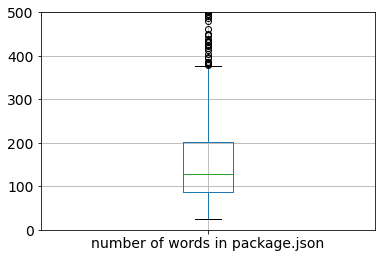

In [92]:
boxplot = complete[complete['target']==0].boxplot(column=['number of words in package.json']) 
boxplot.set_ylim(0,500)

In [66]:
for i in range(0,len(benign_json)):
    print(benign_name[i])
    input=benign_json[i]
    output=ast.literal_eval(input)
    for j in range(0,len(output)):
        data=json.loads(output[j])
        if 'scripts' in data:
            values=set(data['scripts'].values()) #-wordsB
            key=set(data['scripts'].keys()) #-wordsB
            #script = reduce(lambda a, b: a.union(b), data['scripts'].values(), set())
            words=key.union(values)
            list(words)
            words=' '.join(words).split()
            words = [s.replace("'", '') for s in words]
            words = [s.replace('"', '') for s in words]
            words=set(words)
            script=list(words-wordsB)
            print(script)
            generalization=[]
            for k in range(0,len(script)):
                gen=gen_language_16(script[k])
                generalization.append(gen)
            print(generalization)
        

URIjs-1.16.1
abs1004-axios-0.21.4
['--tags', 'npm', 'postversion', './examples/server.js', 'eslint', 'examples', 'NODE_ENV=production', 'package.json', 'bower.json', 'coverage/lcov.info', './node_modules/coveralls/bin/coveralls.js', '-A', '|', '&&', 'lib/**/*.js', 'dist', '--fix', './sandbox/server.js', 'CHANGELOG.md']
['aallll', 'lll', 'lllllllllll', 'phllllllllhllllllpll', 'llllll', 'llllllll', 'uuuusuuuellllllllll', 'lllllllpllll', 'lllllpllll', 'llllllllhllllpllll', 'phllllslllllllhlllllllllhlllhlllllllllpll', 'au', 'i', 'ss', 'lllhsshspll', 'llll', 'aalll', 'phlllllllhllllllpll', 'uuuuuuuuupll']
acc-strapi-1.0.0
['postinstall', 'lib/utils/success.js']
['lllllllllll', 'lllhlllllhlllllllpll']
accounting-0.4.1
actid-react-error-overlay-4.0.5
['&&', 'npm', 'build.js', 'prepublishOnly', 'build:prod', 'NODE_ENV=production', 'cross-env', 'NODE_ENV=development', '--watch', 'NODE_ENV=test']
['ss', 'lll', 'lllllpll', 'llllllllllulll', 'lllllcllll', 'uuuusuuuellllllllll', 'lllllalll', 'uuuus